In [285]:
import warnings 
warnings.filterwarnings('ignore')
# A  function to compare predicted values with actual and count how many are correct



## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [286]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import numpy as np
from sklearn import metrics
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns;sns.set()
iris_df = pd.read_csv("iris.csv")

subset_iris=iris_df.sample(n=10)
print subset_iris

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
146  147            6.3           2.5            5.0           1.9   
49    50            5.0           3.3            1.4           0.2   
80    81            5.5           2.4            3.8           1.1   
24    25            4.8           3.4            1.9           0.2   
72    73            6.3           2.5            4.9           1.5   
3      4            4.6           3.1            1.5           0.2   
115  116            6.4           3.2            5.3           2.3   
64    65            5.6           2.9            3.6           1.3   
16    17            5.4           3.9            1.3           0.4   
131  132            7.9           3.8            6.4           2.0   

             Species  
146   Iris-virginica  
49       Iris-setosa  
80   Iris-versicolor  
24       Iris-setosa  
72   Iris-versicolor  
3        Iris-setosa  
115   Iris-virginica  
64   Iris-versicolor  
16       Iris-setosa  

## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [287]:

iris_df.fillna( iris_df.median(),inplace=True)

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [288]:
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2, }

iris_df.replace({'Species': mapping},inplace=True)

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [289]:
iris_df.drop('Id',axis=1,inplace=True)
iris_df.corr()
#no columns observed -0.1 to +0.1 the minimum correlation was between sepalwidth and sepallength which is -0.109369, hence no columns dropped. the ID is not looking relevant hence it is dropped


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.775061,-0.417318,0.944477,0.952513,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [290]:
iris_df.var()
#no signifiant variation observed, minimum was sepal width i.e.0.185552

SepalLengthCm    0.676645
SepalWidthCm     0.185552
PetalLengthCm    3.076516
PetalWidthCm     0.577141
Species          0.675322
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

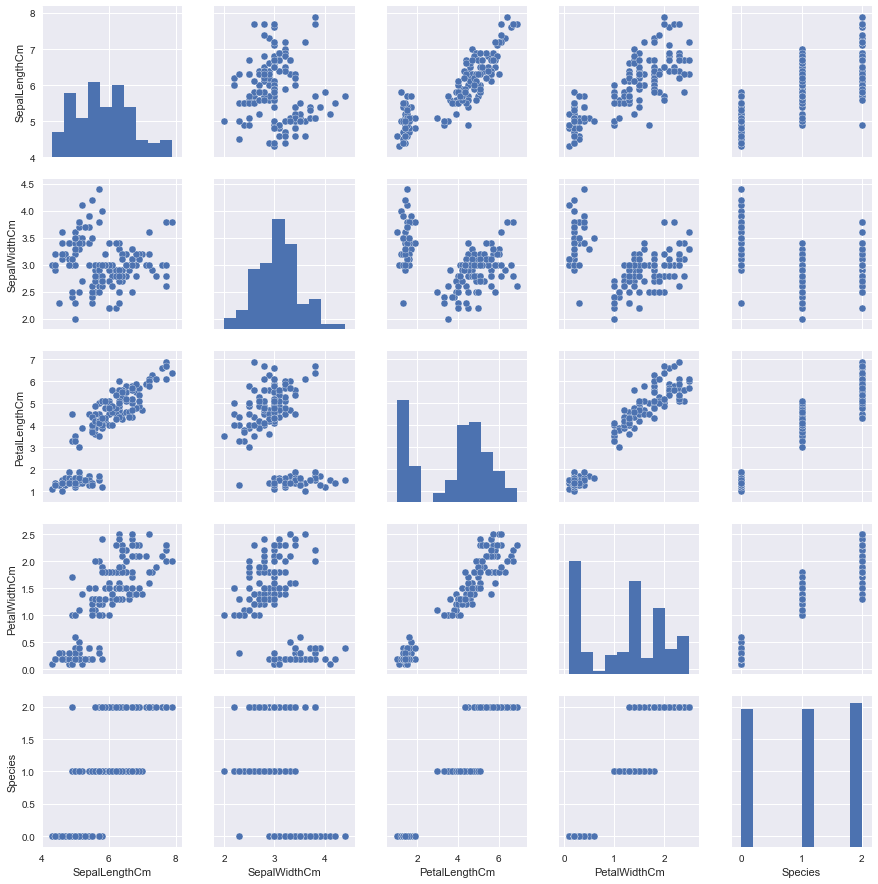

In [291]:
sns.pairplot(iris_df,kind='scatter')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [292]:
subsetx_iris=iris_df.sample(n=151)
X = iris_df.drop("Species" , axis=1)
y = iris_df.pop("Species")
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [293]:
NNH = KNeighborsClassifier(n_neighbors= 9 , weights = 'uniform', metric='euclidean')
NNH.fit(x_train, y_train)
predicted_labels = NNH.predict(x_test)
#print predicted_labels
#print y_test.values
#accuracy_score = getAccuracy(y_test.values, predicted_labels)
accuracy_score(y_test.values,predicted_labels)

#for values K=2 it is coming around 96% and anything above 2 it is giving 100%

1.0

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [294]:

tempdf = pd.DataFrame(np.random.randn(19,2),columns = ['col1','col2'])


for x in range(1,20):
    NNH = KNeighborsClassifier(n_neighbors= x , weights = 'uniform', metric='euclidean')
    NNH.fit(x_train, y_train)
    predicted_labels = NNH.predict(x_test)
    tempdf.ix[x-1,'col1']=x
    tempdf.ix[x-1,'col2']=1-accuracy_score(y_test.values,predicted_labels)
    
print tempdf

    col1      col2
0    1.0  0.032258
1    2.0  0.032258
2    3.0  0.000000
3    4.0  0.000000
4    5.0  0.000000
5    6.0  0.032258
6    7.0  0.032258
7    8.0  0.064516
8    9.0  0.000000
9   10.0  0.000000
10  11.0  0.000000
11  12.0  0.000000
12  13.0  0.000000
13  14.0  0.000000
14  15.0  0.000000
15  16.0  0.000000
16  17.0  0.000000
17  18.0  0.000000
18  19.0  0.000000


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

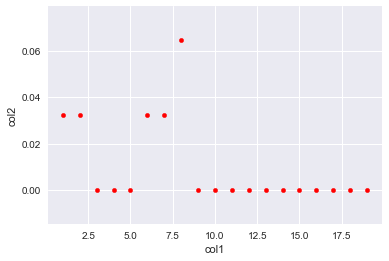

In [295]:

#tips = sns.load_dataset("tempdf")
#ax = sns.regplot(x="col1", y="col2", data='tempdf')

tempdf.plot.scatter(x='col1',y='col2',c='Red')

# Naive Bayes with Iris Data

In [296]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [297]:

array = subsetx_iris.values
X = array[:,0:4] # select all rows and first 7 columns which are the attributes
y = array[:,4]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties


In [298]:
#Check the dataset
print(y)
print(X)

[1. 1. 0. 2. 0. 2. 1. 2. 2. 0. 2. 1. 1. 1. 2. 2. 0. 2. 2. 2. 0. 1. 1. 1.
 0. 0. 1. 0. 2. 0. 0. 2. 1. 1. 2. 1. 0. 1. 1. 2. 2. 0. 0. 1. 2. 0. 0. 2.
 2. 0. 0. 2. 2. 2. 0. 2. 2. 0. 1. 2. 1. 2. 2. 0. 2. 2. 2. 2. 0. 0. 1. 2.
 0. 1. 2. 2. 1. 0. 2. 0. 2. 0. 2. 1. 0. 0. 1. 1. 2. 1. 1. 1. 2. 0. 1. 1.
 0. 1. 2. 0. 1. 1. 2. 0. 0. 1. 2. 1. 0. 1. 0. 0. 1. 0. 2. 1. 1. 1. 2. 0.
 1. 0. 2. 2. 1. 0. 0. 0. 2. 0. 1. 1. 2. 2. 0. 1. 0. 2. 2. 1. 1. 0. 1. 2.
 0. 1. 2. 1. 0. 0. 1.]
[[5.   2.   3.5  1.  ]
 [6.3  2.3  4.4  1.3 ]
 [5.   3.6  1.4  0.2 ]
 [6.5  3.2  5.1  2.  ]
 [5.   3.5  1.6  0.6 ]
 [6.4  2.8  5.6  2.1 ]
 [6.7  3.   5.   1.7 ]
 [6.   2.2  5.   1.5 ]
 [7.4  2.8  6.1  1.9 ]
 [4.5  2.3  1.3  0.3 ]
 [7.2  3.2  6.   1.8 ]
 [6.   2.7  5.1  1.6 ]
 [6.   2.9  4.5  1.5 ]
 [5.5  2.4  3.7  1.  ]
 [5.8  2.7  5.1  1.9 ]
 [7.9  3.8  6.4  2.  ]
 [5.   3.   1.6  0.2 ]
 [4.9  2.5  4.5  1.7 ]
 [6.2  2.8  4.8  1.8 ]
 [6.4  3.1  5.5  1.8 ]
 [5.4  3.7  1.5  0.2 ]
 [5.7  2.8  4.1  1.3 ]
 [6.1  2.9  4.7  1.4 ]
 [6.9  3.1

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

(array([49.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 52.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

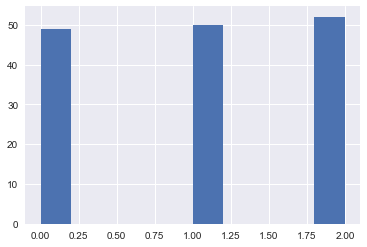

In [299]:

plt.hist(y)

In [300]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [301]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [302]:
#done already

### Split data in Training and test set in 80:20.

In [303]:
test_size = 0.20 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Question 13 
Do Feature Scaling 

In [304]:
# Use StandardScaler or similar methods

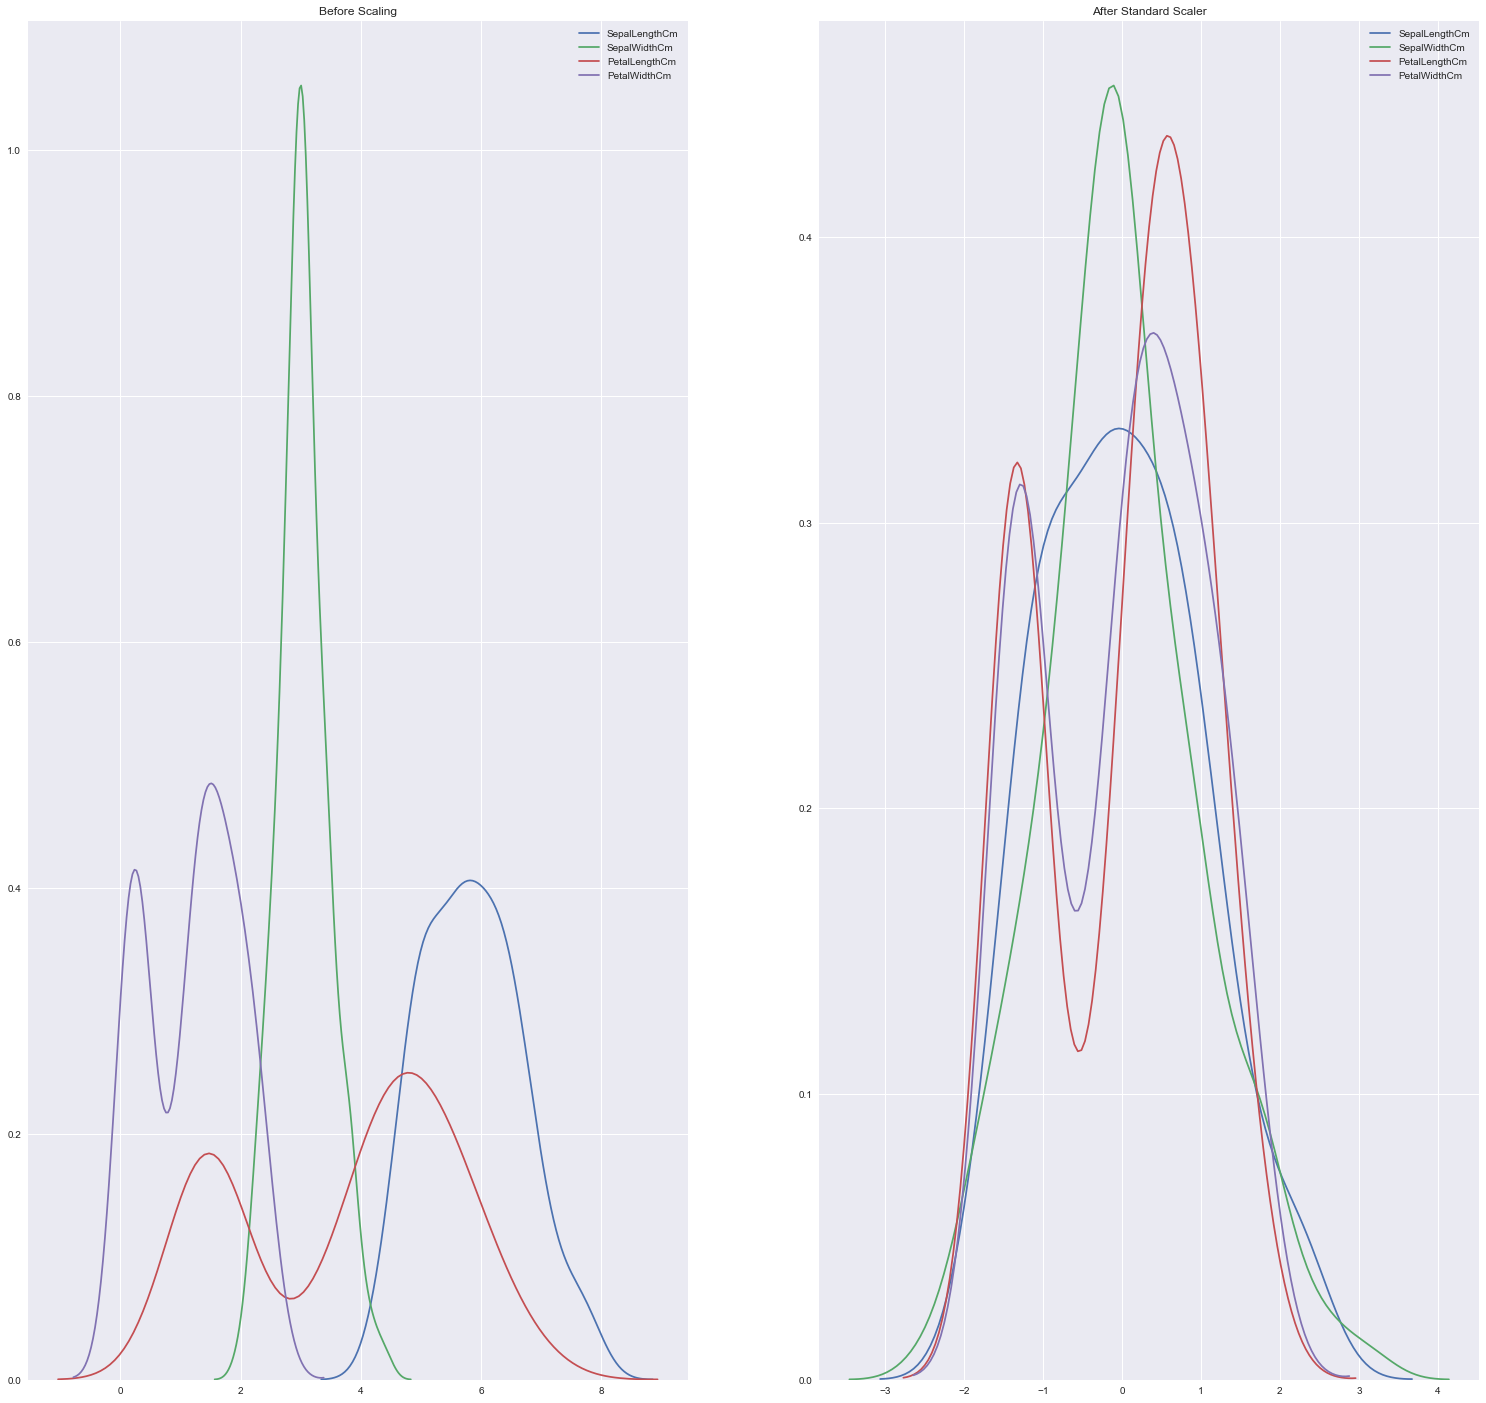

In [305]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(subsetx_iris)
scaled_df = pd.DataFrame(scaled_df, columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm',''])


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(26, 25))


ax1.set_title('Before Scaling')
sns.kdeplot(subsetx_iris['SepalLengthCm'], ax=ax1)
sns.kdeplot(subsetx_iris['SepalWidthCm'], ax=ax1)
sns.kdeplot(subsetx_iris['PetalLengthCm'], ax=ax1)
sns.kdeplot(subsetx_iris['PetalWidthCm'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['SepalLengthCm'], ax=ax2)
sns.kdeplot(scaled_df['SepalWidthCm'], ax=ax2)
sns.kdeplot(scaled_df['PetalLengthCm'], ax=ax2)
sns.kdeplot(scaled_df['PetalWidthCm'], ax=ax2)
plt.show()








### Question 14 
Train and Fit NaiveBayes Model

In [306]:
#Fit the model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [307]:
#Predict
expected = y_test
predicted = model.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [308]:
# show Confusion Matrix
print(metrics.confusion_matrix(expected, predicted))

[[10  0  0]
 [ 0 10  2]
 [ 0  0  9]]


In [309]:
# show accuracy
accuracy_score(expected,predicted)

0.9354838709677419

In [310]:
#Show precision and Recall metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.83      0.91        12
         2.0       0.82      1.00      0.90         9

   micro avg       0.94      0.94      0.94        31
   macro avg       0.94      0.94      0.94        31
weighted avg       0.95      0.94      0.94        31



# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [ ]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [ ]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [ ]:
# use from sklearn.svm import SVC

In [15]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [19]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [20]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [21]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [22]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [23]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
gs.best_score_ 

0.77777777777777779